In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from math import sqrt
sns.set(rc={'figure.figsize':(14,7)})


In [2]:
train = pd.read_csv('train1.csv')
test = pd.read_csv('test1.csv')
sample = pd.read_csv('sample1.csv')

In [3]:
train.shape

(89197, 10)

In [4]:
test.shape

(11121, 9)

In [5]:
train.head(10)


,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13
5,6,9323,25,139,35,Male,Other,240,317,3.33
6,7,2071,7,14,23,Male,Student,160,467,3.80
7,8,21848,8,100,18,Male,Student,280,628,3.87
8,9,12896,3,4,15,Male,Student,270,621,2.88
9,10,16058,5,161,19,Male,Student,240,229,3.80


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [7]:
test.head(10)


,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840
5,89203,5291,42,134,23,Male,Student,290,689
6,89204,22128,5,109,33,Male,Other,240,229
7,89205,23490,16,137,26,Female,Student,270,462
8,89206,4833,21,123,28,Female,Other,320,909
9,89207,12450,19,44,13,Male,Student,230,369


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11121 entries, 0 to 11120
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       11121 non-null  int64 
 1   user_id      11121 non-null  int64 
 2   category_id  11121 non-null  int64 
 3   video_id     11121 non-null  int64 
 4   age          11121 non-null  int64 
 5   gender       11121 non-null  object
 6   profession   11121 non-null  object
 7   followers    11121 non-null  int64 
 8   views        11121 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 782.1+ KB


In [9]:
sample.head()

,row_id,engagement_score
0,89198,5.0
1,89199,5.0
2,89200,5.0
3,89201,5.0
4,89202,5.0


In [10]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11121 entries, 0 to 11120
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            11121 non-null  int64  
 1   engagement_score  11121 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 173.9 KB


In [11]:
train[['user_id','age', 'gender', 'profession']].sort_values('user_id')


,user_id,age,gender,profession
71880,1,18,Female,Student
48005,1,18,Female,Student
30684,1,18,Female,Student
25590,2,28,Female,Working Professional
64557,2,28,Female,Working Professional
...,...,...,...,...
61441,27733,27,Female,Other
269,27733,27,Female,Other
22062,27733,27,Female,Other
13402,27734,15,Male,Student


In [12]:
train[['user_id','age', 'gender', 'profession']].sort_values('user_id').drop_duplicates()


,user_id,age,gender,profession
71880,1,18,Female,Student
25590,2,28,Female,Working Professional
24931,3,17,Male,Student
26234,4,17,Male,Student
58432,5,18,Female,Student
...,...,...,...,...
76448,27730,15,Female,Student
27737,27731,32,Female,Other
58480,27732,37,Female,Other
61441,27733,27,Female,Other


In [13]:
train.shape

(89197, 10)

In [14]:
test.shape

(11121, 9)

In [15]:
train.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

([<matplotlib.patches.Wedge at 0x29f27945a00>,
 [Text(-0.2983518664492101, 1.0587663405049639, 'Male'),
  Text(0.29835186644920947, -1.0587663405049639, 'Female')],
 [Text(-0.1627373816995691, 0.5775089130027075, '58.74%'),
  Text(0.16273738169956878, -0.5775089130027076, '41.26%')])

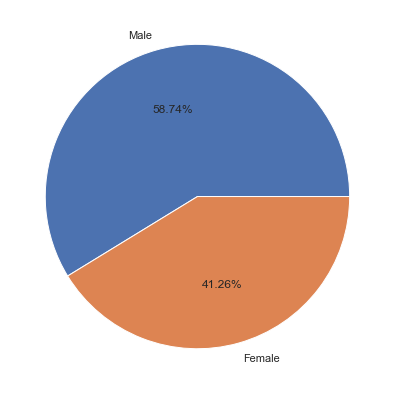

In [16]:
plt.pie(train['gender'].value_counts(),autopct='%1.2f%%',labels=['Male','Female'])

([<matplotlib.patches.Wedge at 0x29f27c86970>,
 [Text(-0.001530422477377319, 1.0999989353663215, 'Student'),
  Text(-0.6415415564462913, -0.8935459872622507, 'Other'),
  Text(0.8926526102464858, -0.6427840363762434, 'Working professional')],
 [Text(-0.0008347758967512648, 0.5999994192907208, '50.04%'),
  Text(-0.34993175806161336, -0.4873887203248639, '30.09%'),
  Text(0.48690142377081036, -0.35060947438704176, '19.87%')])

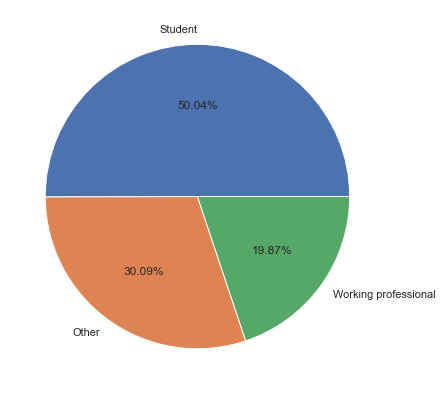

In [17]:
plt.pie(train['profession'].value_counts(),autopct='%1.2f%%',labels=['Student','Other','Working professional'])

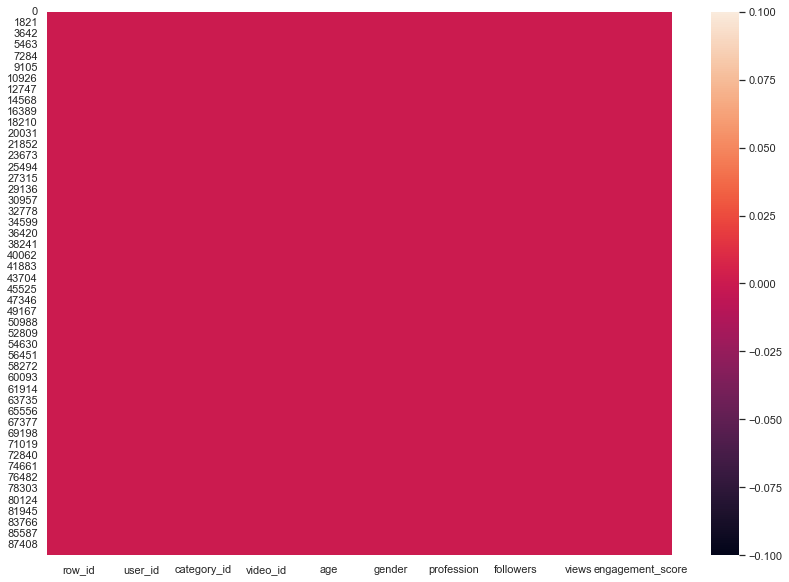

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(train.isnull()) #Missing value in train set             
plt.show()

In [19]:
test.isnull().sum()

row_id         0
user_id        0
category_id    0
video_id       0
age            0
gender         0
profession     0
followers      0
views          0
dtype: int64

([<matplotlib.patches.Wedge at 0x29f28745730>,
 [Text(-0.25147629023693585, 1.0708686546204762, 'Male'),
  Text(0.25147618997497506, -1.070868678165381, 'Female')],
 [Text(-0.13716888558378318, 0.5841101752475324, '57.34%'),
  Text(0.13716883089544094, -0.5841101880902078, '42.66%')])

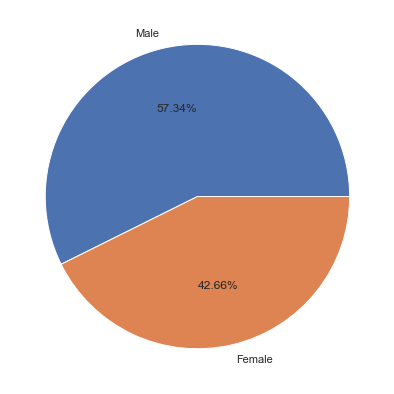

In [20]:
plt.pie(test['gender'].value_counts(),autopct='%1.2f%%',labels=['Male','Female'])

([<matplotlib.patches.Wedge at 0x29f2878cf10>,
 [Text(-0.003573521052902669, 1.0999941954152688, 'Student'),
  Text(-0.6332440896698035, -0.8994453418069728, 'Other'),
  Text(0.8973834036317375, -0.6361627361660837, 'Working professional')],
 [Text(-0.0019491933015832737, 0.5999968338628738, '50.10%'),
  Text(-0.34540586709262006, -0.49060655007653053, '30.27%'),
  Text(0.48948185652640225, -0.3469978560905911, '19.63%')])

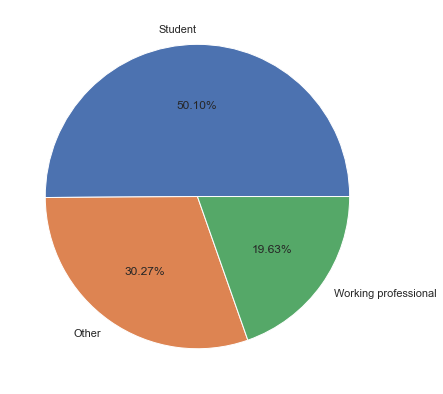

In [21]:
plt.pie(test['profession'].value_counts(),autopct='%1.2f%%',labels=['Student','Other','Working professional'])

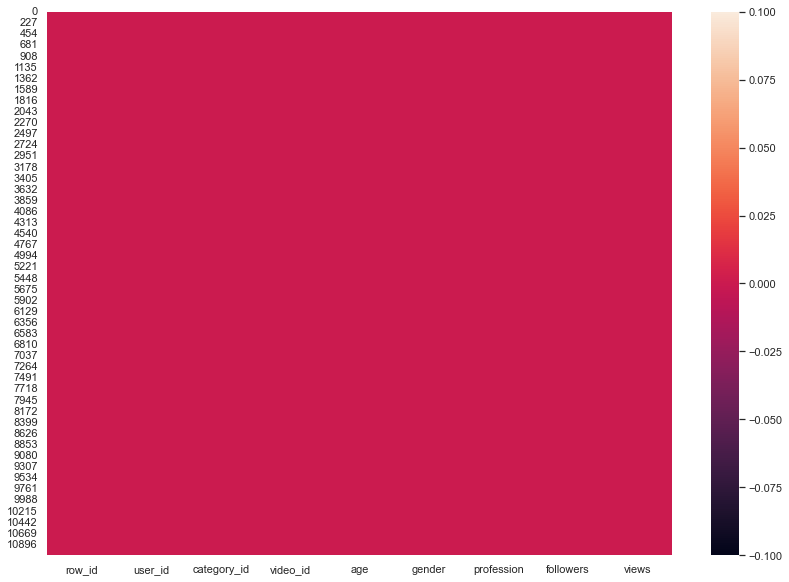

In [22]:
plt.figure(figsize=(14,10))
sns.heatmap(test.isnull()) # Missing values in test set
plt.show()

In [23]:
train["user_id"].value_counts()


5198     10
13218    10
1448     10
13410    10
7157     10
         ..
21507     2
4404      2
21430     2
17541     2
11279     2
Name: user_id, Length: 27734, dtype: int64

In [24]:
train["category_id"].value_counts()


5     8104
8     6313
25    4880
19    4679
21    4043
12    3889
11    3766
4     3678
34    3297
16    3264
13    2777
32    2712
23    2671
18    2241
42    2178
15    2164
9     1886
7     1885
31    1855
3     1845
1     1810
6     1399
39    1339
28    1309
10    1217
17    1208
26    1156
27    1103
36    1025
43    1019
35     986
37     962
29     916
20     702
30     548
41     545
14     536
38     534
24     524
33     517
40     458
22     366
46     236
45     227
44     214
2      167
47      47
Name: category_id, dtype: int64

<AxesSubplot:xlabel='category_id', ylabel='count'>

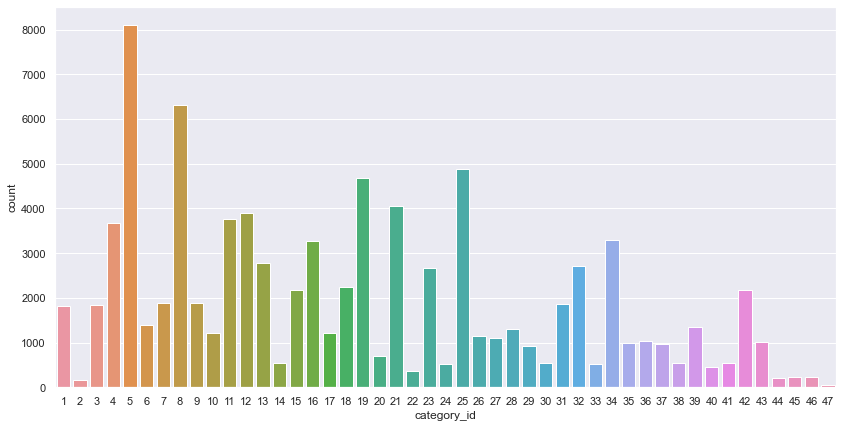

In [25]:
sns.countplot(data=train,x='category_id')

In [26]:
cat_features = [i for i in train.columns if train[i].dtypes == 'object']     
cat_features

['gender', 'profession']

<AxesSubplot:xlabel='age', ylabel='count'>

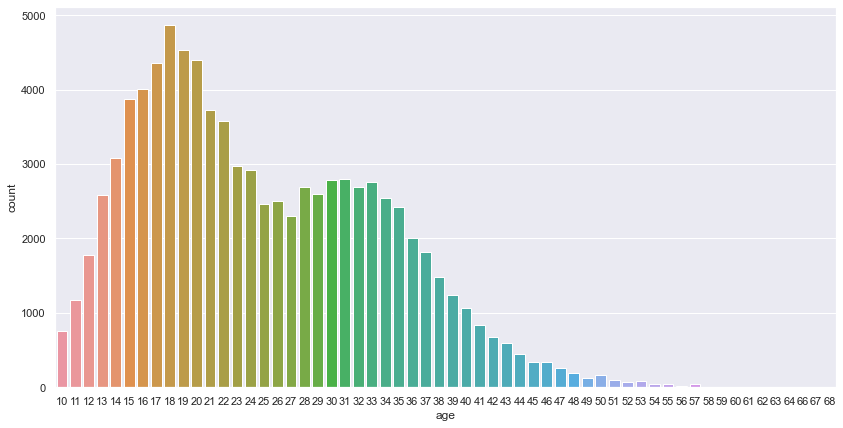

In [27]:
sns.countplot(data=train,x='age')

<AxesSubplot:xlabel='gender', ylabel='count'>

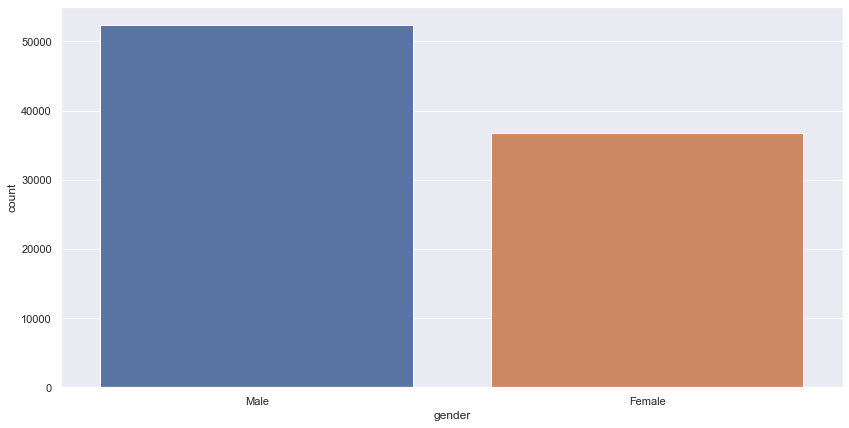

In [28]:
sns.countplot(data=train,x='gender')

<AxesSubplot:xlabel='engagement_score', ylabel='profession'>

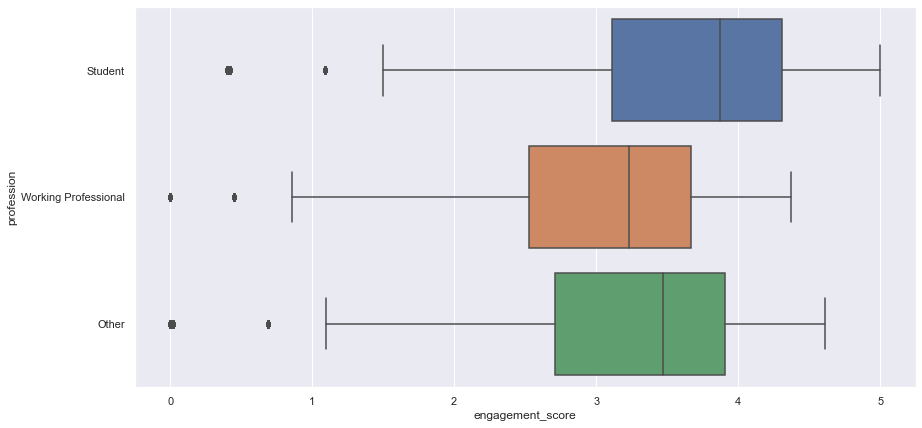

In [29]:
sns.boxplot(data=train,x='engagement_score',y='profession')


<AxesSubplot:xlabel='followers', ylabel='engagement_score'>

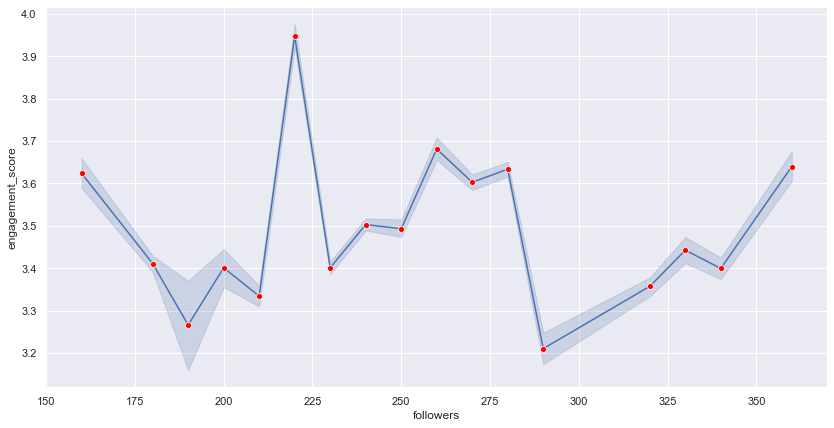

In [30]:
sns.lineplot(data=train,y='engagement_score',x='followers',marker='o',markerfacecolor='red')

<AxesSubplot:xlabel='views', ylabel='engagement_score'>

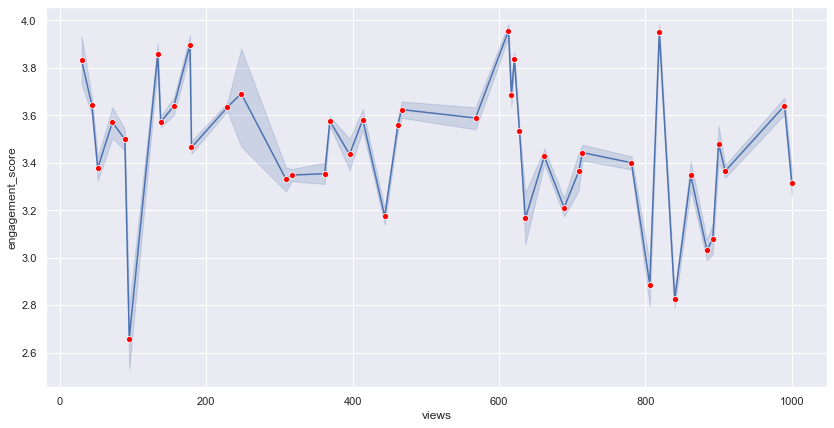

In [31]:
sns.lineplot(data=train,y='engagement_score',x='views',marker='o',markerfacecolor='red')


<AxesSubplot:xlabel='age', ylabel='engagement_score'>

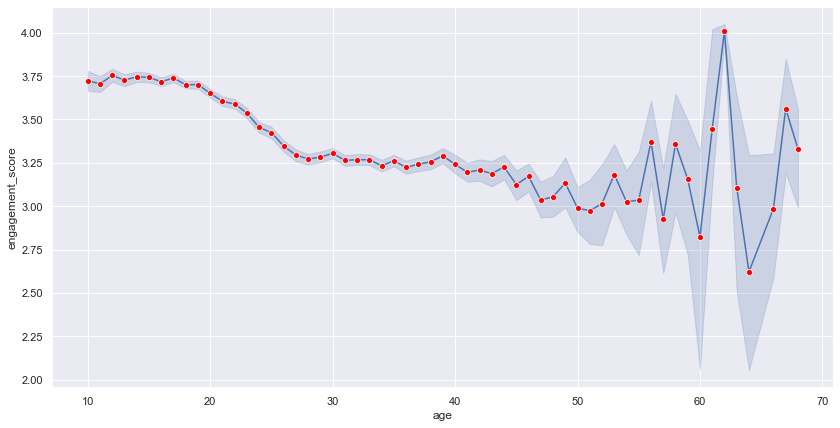

In [32]:
sns.lineplot(data=train,y='engagement_score',x='age',marker='o',markerfacecolor='red')


<AxesSubplot:xlabel='engagement_score', ylabel='gender'>

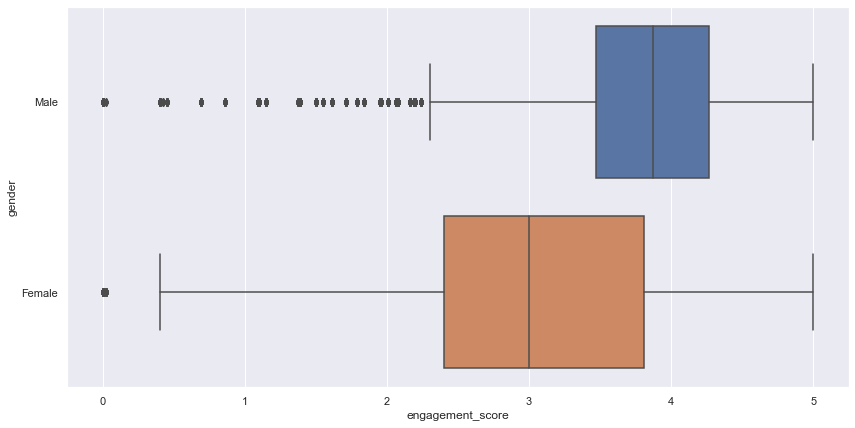

In [33]:
sns.boxplot(data=train,x='engagement_score',y='gender')


In [34]:
train["video_id"].value_counts()


112    1337
53     1334
1      1282
65     1103
42     1077
       ... 
165      78
171      78
174      70
166      66
175      47
Name: video_id, Length: 175, dtype: int64

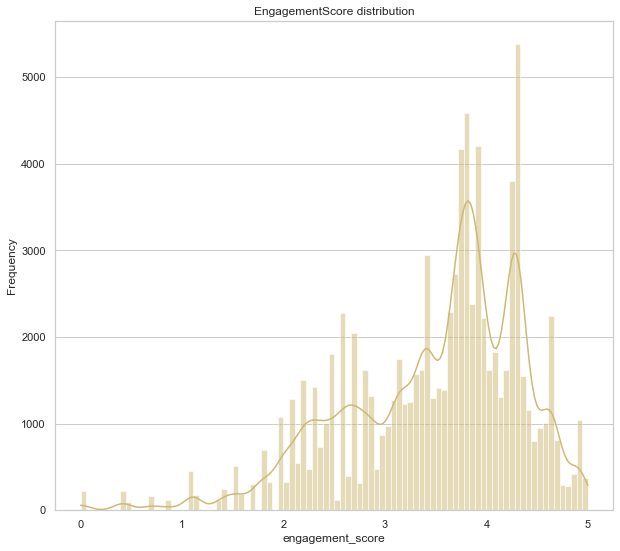

In [35]:
sns.set_style("whitegrid")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(10,9))
#Check the new distribution 
sns.histplot(train['engagement_score'], color="y",kde=True);
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="engagement_score")
ax.set(title="EngagementScore distribution")
#sns.despine(trim=True, left=True)
plt.show()

In [36]:
print("Mean: %f" % train['engagement_score'].mean())
print("Median: %f" % train['engagement_score'].median())
print("Standard deviation: %f" % train['engagement_score'].std())
print("Skewness: %f" % train['engagement_score'].skew())
#print("Kurtosis: %f" % train['engagement_score'].kurt())

Mean: 3.487797
Median: 3.710000
Standard deviation: 0.863498
Skewness: -0.855630


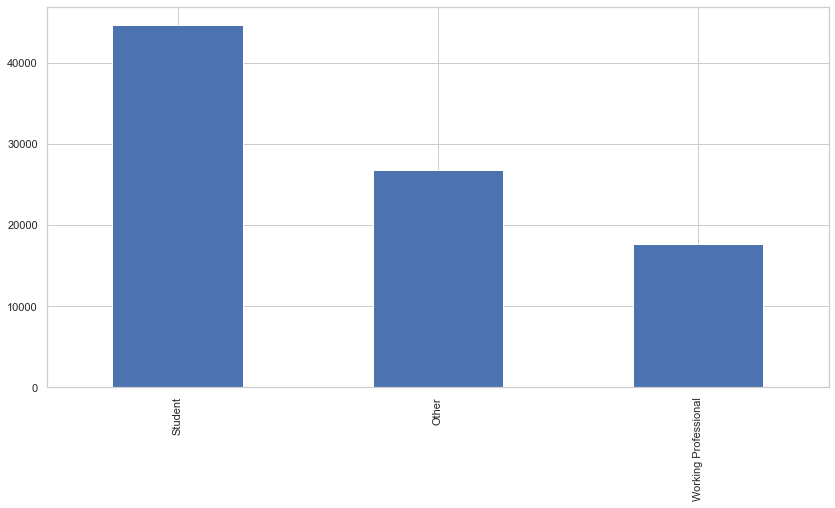

In [37]:
train.profession.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [38]:
print(train['gender'].value_counts())
dummies = pd.get_dummies(train['gender'],drop_first=True)
train1 = pd.concat([train.drop('gender',axis=1),dummies],axis=1)


Male      52397
Female    36800
Name: gender, dtype: int64


In [39]:
train1.head(10) 

,row_id,user_id,category_id,video_id,age,profession,followers,views,engagement_score,Male
0,1,19990,37,128,24,Student,180,1000,4.33,1
1,2,5304,32,132,14,Student,330,714,1.79,0
2,3,1840,12,24,19,Student,180,138,4.35,1
3,4,12597,23,112,19,Student,220,613,3.77,1
4,5,13626,23,112,27,Working Professional,220,613,3.13,1
5,6,9323,25,139,35,Other,240,317,3.33,1
6,7,2071,7,14,23,Student,160,467,3.80,1
7,8,21848,8,100,18,Student,280,628,3.87,1
8,9,12896,3,4,15,Student,270,621,2.88,1
9,10,16058,5,161,19,Student,240,229,3.80,1


In [40]:
print(train1['profession'].value_counts())
dummies = pd.get_dummies(train1['profession'],drop_first=True)
train1 = pd.concat([train1.drop('profession',axis=1),dummies],axis=1)

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64


In [41]:
train1.head()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score,Male,Student,Working Professional
0,1,19990,37,128,24,180,1000,4.33,1,1,0
1,2,5304,32,132,14,330,714,1.79,0,1,0
2,3,1840,12,24,19,180,138,4.35,1,1,0
3,4,12597,23,112,19,220,613,3.77,1,1,0
4,5,13626,23,112,27,220,613,3.13,1,0,1


<AxesSubplot:xlabel='age', ylabel='Count'>

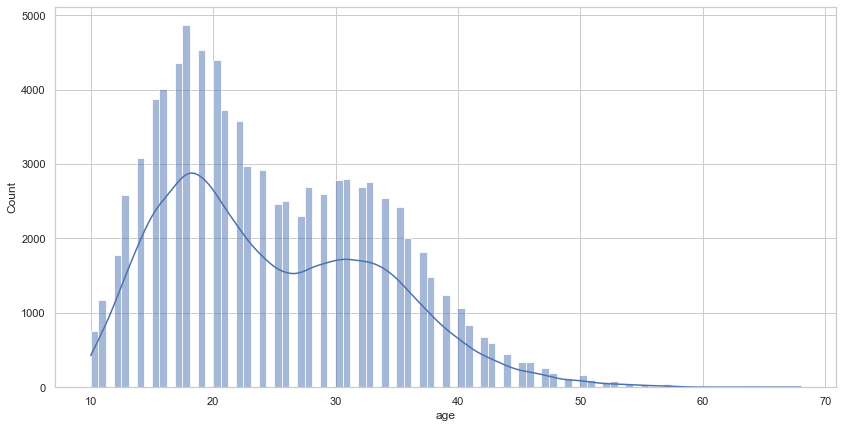

In [42]:
sns.histplot(data = train1, x = "age", kde = True)


<AxesSubplot:xlabel='followers', ylabel='Count'>

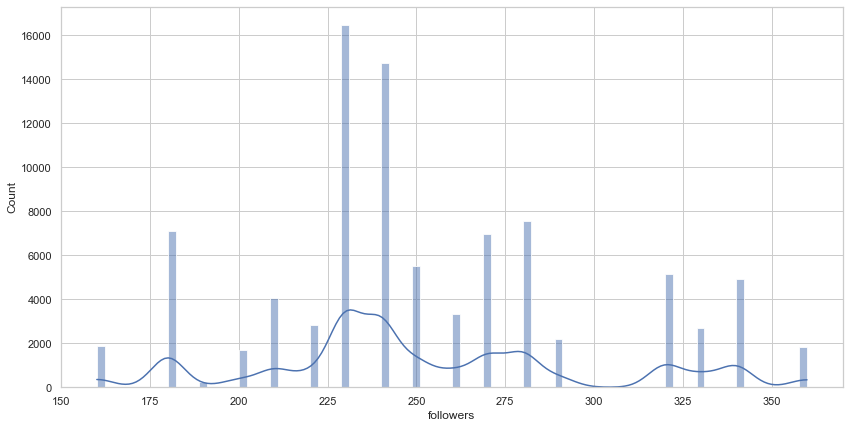

In [43]:
sns.histplot(data = train1, x = "followers", kde = True)


<AxesSubplot:xlabel='views', ylabel='Count'>

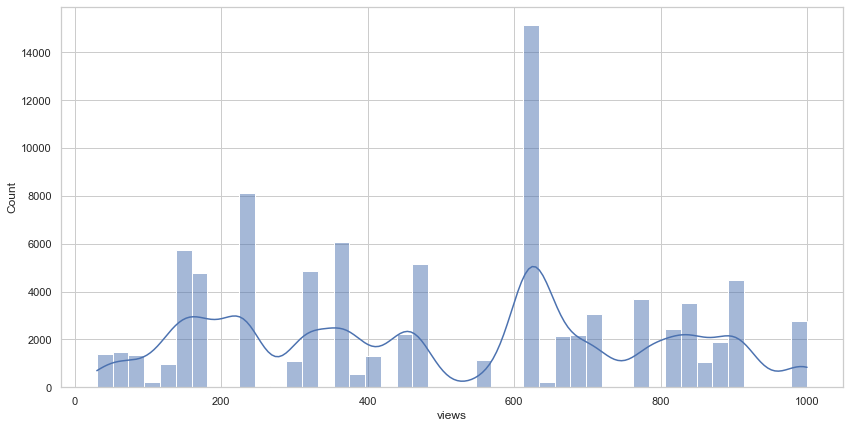

In [44]:
sns.histplot(data = train1, x = "views", kde = True)


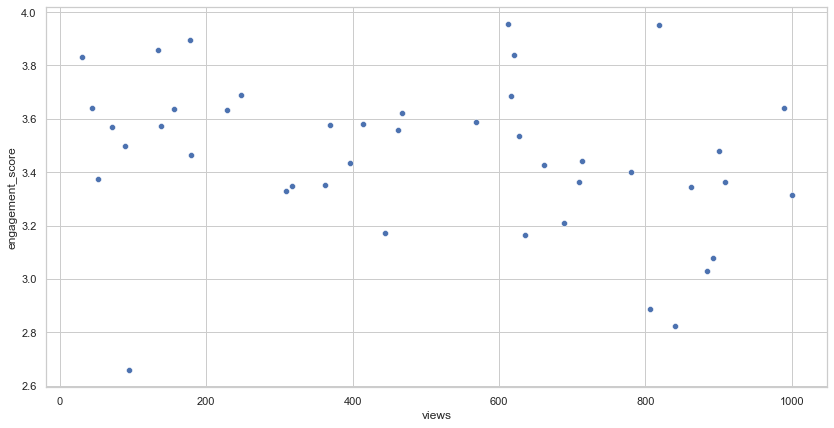

In [45]:
views_df= pd.DataFrame(train1.groupby(by='views')['engagement_score'].mean().sort_values(ascending=False))
views_df.reset_index(inplace=True)
views_df.sort_values(by = 'views',ascending=False)
sns.scatterplot(x=views_df.views,y=views_df.engagement_score)
plt.show()

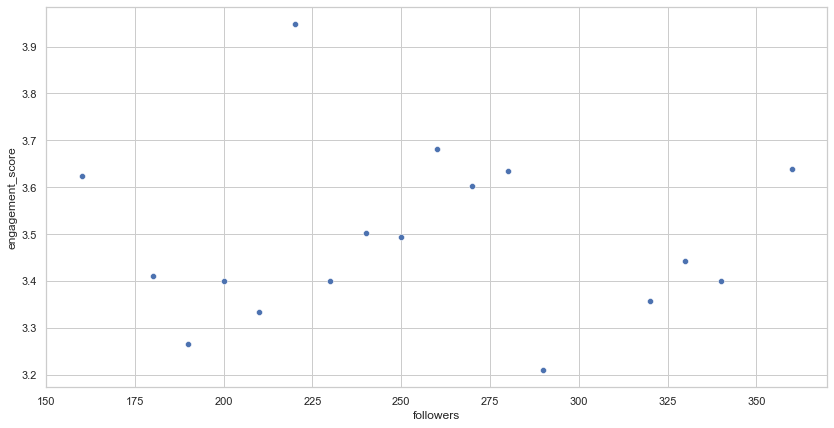

In [46]:
followers_df= pd.DataFrame(train1.groupby(by='followers')['engagement_score'].mean().sort_values(ascending=False))
followers_df.reset_index(inplace=True)
followers_df.sort_values(by = 'followers',ascending=False)

sns.scatterplot(x=followers_df.followers,y=followers_df.engagement_score)
plt.show()

In [47]:
train1.drop(['row_id'], axis=1, inplace=True)
#test.drop(['row_id','user_id'], axis=1, inplace=True)
train1.shape

(89197, 10)

In [48]:
train1.head()

,user_id,category_id,video_id,age,followers,views,engagement_score,Male,Student,Working Professional
0,19990,37,128,24,180,1000,4.33,1,1,0
1,5304,32,132,14,330,714,1.79,0,1,0
2,1840,12,24,19,180,138,4.35,1,1,0
3,12597,23,112,19,220,613,3.77,1,1,0
4,13626,23,112,27,220,613,3.13,1,0,1


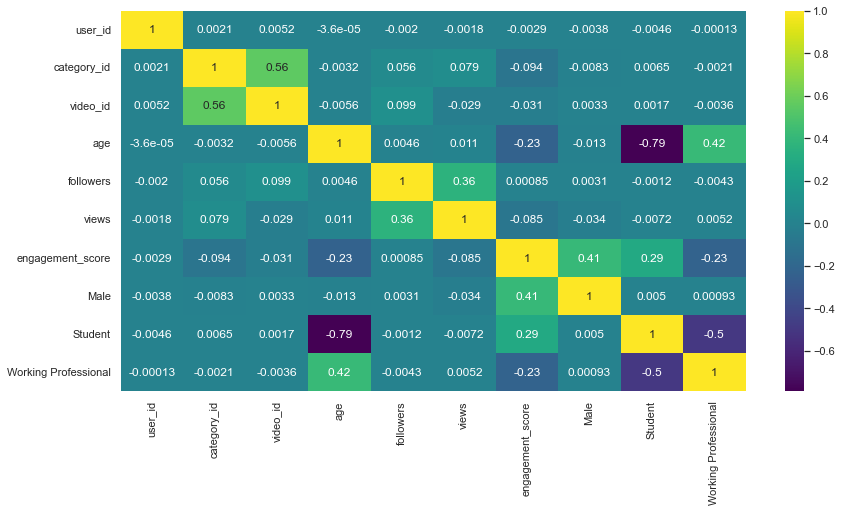

In [79]:
corr = train1.corr()
plt.subplots(figsize=(14,7))
dataplot = sns.heatmap(corr, cmap="viridis", annot=True) 
plt.show()

In [50]:
X=train1.drop(['engagement_score'], axis=1)
Y=train1['engagement_score']

In [51]:
X.head()

,user_id,category_id,video_id,age,followers,views,Male,Student,Working Professional
0,19990,37,128,24,180,1000,1,1,0
1,5304,32,132,14,330,714,0,1,0
2,1840,12,24,19,180,138,1,1,0
3,12597,23,112,19,220,613,1,1,0
4,13626,23,112,27,220,613,1,0,1


In [52]:
Y.head()

0    4.33
1    1.79
2    4.35
3    3.77
4    3.13
Name: engagement_score, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [80]:
print("The size of training input is", X_train.shape)
print("The size of training output is", Y_train.shape)
print("The size of testing input is", X_test.shape)
print("The size of testing output is", Y_test.shape)

The size of training input is (71357, 9)
The size of training output is (71357,)
The size of testing input is (17840, 9)
The size of testing output is (17840,)


In [55]:
print("The size of testing input is", X_test.shape)
print("The size of testing output is", Y_test.shape)

The size of testing input is (17840, 9)
The size of testing output is (17840,)


In [56]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,Y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [57]:
Y_train_pred =ridge_regressor.predict(X_train) #Predict train result
Y_test_pred =ridge_regressor.predict(X_test) #Predict test result

In [58]:
print("Root mean squared error: ", sqrt(mse(Y_train.values, Y_train_pred)))
print("Mean absolute error: ",mae(Y_train.values, Y_train_pred))
print("R-squared: ", r2_score(Y_train.values, Y_train_pred))

Root mean squared error:  0.7360760525443968
Mean absolute error:  0.5680515208205575
R-squared:  0.27092743621194526


In [59]:
print("Root mean squared error: ", sqrt(mse(Y_test, Y_test_pred)))
print("Mean absolute error: ",mae(Y_test, Y_test_pred))
print("R-squared: ", r2_score(Y_test, Y_test_pred))

Root mean squared error:  0.7386171417905056
Mean absolute error:  0.5687148260816713
R-squared:  0.2778788616815383


In [60]:
test.dtypes

row_id          int64
user_id         int64
category_id     int64
video_id        int64
age             int64
gender         object
profession     object
followers       int64
views           int64
dtype: object

In [61]:
test.isnull().sum()


row_id         0
user_id        0
category_id    0
video_id       0
age            0
gender         0
profession     0
followers      0
views          0
dtype: int64

In [62]:
test.head()


,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [63]:
print(test['gender'].value_counts())
dummies = pd.get_dummies(test['gender'],drop_first=True)
test1 = pd.concat([test.drop('gender',axis=1),dummies],axis=1)

Male      6377
Female    4744
Name: gender, dtype: int64


In [64]:
print(test1['profession'].value_counts())
dummies = pd.get_dummies(test1['profession'],drop_first=True)
test1 = pd.concat([test1.drop('profession',axis=1),dummies],axis=1)

Student                 5572
Other                   3366
Working Professional    2183
Name: profession, dtype: int64


In [65]:
test1=test1.drop(['row_id'],axis=1)


In [66]:
test1.head()

,user_id,category_id,video_id,age,followers,views,Male,Student,Working Professional
0,7986,12,42,14,180,138,1,1,0
1,11278,34,115,14,230,840,1,1,0
2,17245,8,110,44,280,628,0,0,1
3,9851,16,137,18,270,462,1,1,0
4,16008,34,96,47,230,840,0,0,0


In [67]:
test1.dtypes

user_id                 int64
category_id             int64
video_id                int64
age                     int64
followers               int64
views                   int64
Male                    uint8
Student                 uint8
Working Professional    uint8
dtype: object

In [68]:
Y_test_ridge = ridge_regressor.predict(test1)


In [69]:
Y_test_pred

array([2.94807079, 2.97477955, 3.21465898, ..., 3.66040653, 2.64716378,
       4.15647706])

In [70]:
test1['engagement_score_ridge'] = Y_test_ridge


In [71]:
test1

,user_id,category_id,video_id,age,followers,views,Male,Student,Working Professional,engagement_score_ridge
0,7986,12,42,14,180,138,1,1,0,4.104768
1,11278,34,115,14,230,840,1,1,0,3.839753
2,17245,8,110,44,280,628,0,0,1,2.766573
3,9851,16,137,18,270,462,1,1,0,4.085669
4,16008,34,96,47,230,840,0,0,0,2.738871
...,...,...,...,...,...,...,...,...,...,...
11116,26336,25,140,21,240,317,1,1,0,4.037159
11117,6772,8,100,19,280,628,0,1,0,3.395434
11118,2042,16,98,22,270,462,1,1,0,4.077724
11119,24626,8,16,33,280,628,1,0,0,3.667593


In [72]:
test=pd.read_csv("test1.csv")


In [73]:
test

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840
...,...,...,...,...,...,...,...,...,...
11116,100314,26336,25,140,21,Male,Student,240,317
11117,100315,6772,8,100,19,Female,Student,280,628
11118,100316,2042,16,98,22,Male,Student,270,462
11119,100317,24626,8,16,33,Male,Other,280,628


In [74]:
test1['row_id']=test['row_id']


In [75]:
test1

,user_id,category_id,video_id,age,followers,views,Male,Student,Working Professional,engagement_score_ridge,row_id
0,7986,12,42,14,180,138,1,1,0,4.104768,89198
1,11278,34,115,14,230,840,1,1,0,3.839753,89199
2,17245,8,110,44,280,628,0,0,1,2.766573,89200
3,9851,16,137,18,270,462,1,1,0,4.085669,89201
4,16008,34,96,47,230,840,0,0,0,2.738871,89202
...,...,...,...,...,...,...,...,...,...,...,...
11116,26336,25,140,21,240,317,1,1,0,4.037159,100314
11117,6772,8,100,19,280,628,0,1,0,3.395434,100315
11118,2042,16,98,22,270,462,1,1,0,4.077724,100316
11119,24626,8,16,33,280,628,1,0,0,3.667593,100317


In [81]:
test1.head()

,user_id,category_id,video_id,age,followers,views,Male,Student,Working Professional,engagement_score_ridge,row_id
0,7986,12,42,14,180,138,1,1,0,4.104768,89198
1,11278,34,115,14,230,840,1,1,0,3.839753,89199
2,17245,8,110,44,280,628,0,0,1,2.766573,89200
3,9851,16,137,18,270,462,1,1,0,4.085669,89201
4,16008,34,96,47,230,840,0,0,0,2.738871,89202


In [76]:
#test1.to_csv("predictions_data.csv")


<AxesSubplot:xlabel='views', ylabel='engagement_score_ridge'>

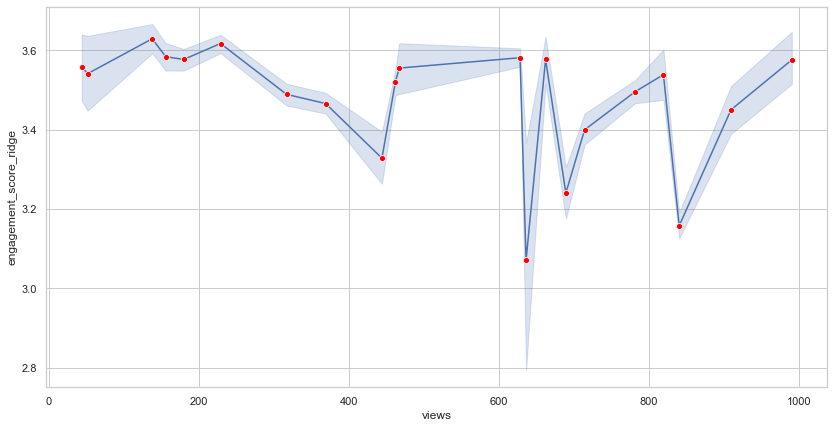

In [77]:
sns.lineplot(data=test1,y='engagement_score_ridge',x='views',marker='o',markerfacecolor='red')
